In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re

In [340]:
train_df = pd.read_csv("./data/train.csv")
train_df.head()

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Reviewer_Score,Tags,Hotel_Nation,Negative_Review_Nouns,Positive_Review_Nouns,Hotel_Location,Hotel_Service,Hotel_Room,Hotel_F&A,Hotel_Meal,Customer_Location,Customer_Service,Customer_Room,Customer_F&A,Customer_Meal
0,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,empty,The staff are so friendly and helpful,10.0,"[' Leisure trip ', ' Solo traveler ', ' Superi...",UK,empty,staff,0.394052,0.401487,-0.107807,-0.05948,0.037175,0.00,1.0000,0.0,0.000,0.0000
1,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,Sadly the day of my presentation the woman on...,The room and location were absolutely brillia...,9.6,"[' Business trip ', ' Solo traveler ', ' Super...",UK,day presentation woman desk note inbox driver ...,room location staff way bit bathroom snob touc...,0.394052,0.401487,-0.107807,-0.05948,0.037175,0.40,0.0000,0.2,0.200,0.2000
2,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,empty,The whole experience from start to finish was...,10.0,"[' Leisure trip ', ' Couple ', ' Deluxe King R...",UK,empty,experience start finish service none room brea...,0.394052,0.401487,-0.107807,-0.05948,0.037175,0.00,0.6000,0.2,0.000,0.2000
3,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,Still under renovation so building noise stil...,Breakfast amazing location perfect for west e...,8.3,"[' Leisure trip ', ' Couple ', ' Deluxe King R...",UK,renovation building noise problem outside,breakfast location west end king road area,0.394052,0.401487,-0.107807,-0.05948,0.037175,0.50,-0.2500,0.0,0.000,0.2500
4,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,The renovations were still on going and I tho...,Staff amazing very helpful and couldn t have ...,7.1,"[' Leisure trip ', ' Group ', ' Superior Queen...",UK,renovation december january sound drilling bre...,staff,0.394052,0.401487,-0.107807,-0.05948,0.037175,-0.25,-0.0625,-0.5,-0.125,-0.0625


In [341]:
def remove_punc(tags):
  punct = "'[]"
  tags = tags.lower().translate(str.maketrans("", "", punct)).strip()
  return tags

train_df["Tags"] = train_df["Tags"].apply(lambda x: remove_punc(x))

In [342]:
unique_tags = {}
for tags in train_df["Tags"]:
  for tag in tags.split(","):
    tag = tag.strip()
    unique_tags[tag] = unique_tags.get(tag, 0) + 1

In [343]:
for tag in unique_tags:
  if "family" in tag:
    print(tag)

family with older children
family with young children
family studio
family room
family suite
family room 2 adults 2 children
family duplex room
large family suite
deluxe family room with view
family room 4 adults
family apartment 2 adults 2 children
deluxe family room
executive family room
family room sleeps four
family room with balcony
family room two connecting rooms
family room 5 adults
family room 3 adults
superior family room
family two bedroom suite
family room 2 adults 1 child
duplex family suite with spa bath
family room free wi fi
family suite 4 adults
premium family room
family premium room 2 adults 2 children
family room 4 people
family room 4 guest
family room 2 adults 3 children
standard family room
hoxton family suite
family queen room
family room with sofa bed
two bedroom family room
triple family guestroom
double family guestroom
double family guest room
king deluxe family room
family room 2 connected double rooms
family suite 2 adults 2 children
family room 3 adults 1

In [344]:
sorted_tags = sorted(unique_tags.items(), reverse=True, key=lambda x: x[1])
sorted_tags

[('leisure trip', 333411),
 ('submitted from a mobile device', 245447),
 ('couple', 201351),
 ('stayed 1 night', 154735),
 ('stayed 2 nights', 106705),
 ('solo traveler', 86750),
 ('stayed 3 nights', 76503),
 ('business trip', 66133),
 ('group', 52152),
 ('family with young children', 48615),
 ('stayed 4 nights', 38131),
 ('double room', 28118),
 ('standard double room', 25759),
 ('superior double room', 24962),
 ('family with older children', 20906),
 ('deluxe double room', 19880),
 ('double or twin room', 17937),
 ('stayed 5 nights', 16570),
 ('standard double or twin room', 13953),
 ('classic double room', 13365),
 ('superior double or twin room', 10828),
 ('2 rooms', 9861),
 ('standard twin room', 7798),
 ('single room', 7742),
 ('stayed 6 nights', 7731),
 ('twin room', 6656),
 ('stayed 7 nights', 5920),
 ('executive double room', 5093),
 ('classic double or twin room', 4870),
 ('superior twin room', 4836),
 ('deluxe double or twin room', 4727),
 ('club double room', 4677),
 ('quee

In [345]:
final_tags = sorted_tags[:330]

In [346]:
stay = []
for tag in final_tags:
  if "single" in tag[0]:
    stay.append(tag)
stay

[('single room', 7742),
 ('standard single room', 3717),
 ('deluxe single room', 2602),
 ('superior single room', 902),
 ('classic single room', 875),
 ('cosy single room', 380),
 ('superior room with 2 single beds', 310),
 ('club single room', 307),
 ('double room with single bed', 277),
 ('standard room with 1 single bed', 267),
 ('small single room', 259),
 ('basic single room', 258),
 ('standard room with 2 single beds', 228),
 ('deluxe double and single room', 221),
 ('executive single room', 165),
 ('single room with shower', 159),
 ('cabin single room', 159),
 ('superior suite with 1 double bed and 1 single bed', 141),
 ('economy single room', 117),
 ('standard double room with two single beds', 113),
 ('premier single room', 109),
 ('single room annex', 100)]

In [347]:
train_df["trip_type"] = train_df["Tags"].apply(lambda x: 1 if "leisure trip" in x else 0)
train_df

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Reviewer_Score,Tags,Hotel_Nation,Negative_Review_Nouns,Positive_Review_Nouns,...,Hotel_Service,Hotel_Room,Hotel_F&A,Hotel_Meal,Customer_Location,Customer_Service,Customer_Room,Customer_F&A,Customer_Meal,trip_type
0,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,empty,The staff are so friendly and helpful,10.0,"leisure trip , solo traveler , superior quee...",UK,empty,staff,...,0.401487,-0.107807,-0.059480,0.037175,0.000000,1.000000,0.000000,0.000000,0.000000,1
1,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,Sadly the day of my presentation the woman on...,The room and location were absolutely brillia...,9.6,"business trip , solo traveler , superior que...",UK,day presentation woman desk note inbox driver ...,room location staff way bit bathroom snob touc...,...,0.401487,-0.107807,-0.059480,0.037175,0.400000,0.000000,0.200000,0.200000,0.200000,0
2,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,empty,The whole experience from start to finish was...,10.0,"leisure trip , couple , deluxe king room , ...",UK,empty,experience start finish service none room brea...,...,0.401487,-0.107807,-0.059480,0.037175,0.000000,0.600000,0.200000,0.000000,0.200000,1
3,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,Still under renovation so building noise stil...,Breakfast amazing location perfect for west e...,8.3,"leisure trip , couple , deluxe king room , ...",UK,renovation building noise problem outside,breakfast location west end king road area,...,0.401487,-0.107807,-0.059480,0.037175,0.500000,-0.250000,0.000000,0.000000,0.250000,1
4,11 Cadogan Gardens Sloane Square Kensington an...,8.7,11 Cadogan Gardens,The renovations were still on going and I tho...,Staff amazing very helpful and couldn t have ...,7.1,"leisure trip , group , superior queen room ,...",UK,renovation december january sound drilling bre...,staff,...,0.401487,-0.107807,-0.059480,0.037175,-0.250000,-0.062500,-0.500000,-0.125000,-0.062500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411479,Margaretenstra e 92 05 Margareten 1050 Vienna ...,8.5,pentahotel Vienna,None,The staff were very friendly and helpful The ...,9.6,"leisure trip , solo traveler , penta standar...",Austria,none,staff lobby area marriott hilton hotel busines...,...,0.000000,-0.113636,-0.151515,-0.007576,0.444444,0.111111,0.111111,0.111111,0.222222,1
411480,Margaretenstra e 92 05 Margareten 1050 Vienna ...,8.5,pentahotel Vienna,A bit of distance from the old town but i had...,Everything,9.6,"leisure trip , group , penta standard room ,...",Austria,bit distance town card friend,everything,...,0.000000,-0.113636,-0.151515,-0.007576,-0.666667,-0.333333,0.000000,0.000000,0.000000,1
411481,Margaretenstra e 92 05 Margareten 1050 Vienna ...,8.5,pentahotel Vienna,The wifi was pretty actually really slow in o...,Location is awesome with many restaurants aro...,9.6,"leisure trip , couple , penta standard room ...",Austria,room thing,location restaurant neighborhood distance sigh...,...,0.000000,-0.113636,-0.151515,-0.007576,0.700000,0.200000,0.100000,0.000000,0.000000,1
411482,Margaretenstra e 92 05 Margareten 1050 Vienna ...,8.5,pentahotel Vienna,The room was smelling like someone was smokin...,empty,8.8,"leisure trip , couple , penta standard room ...",Austria,room someone night night,empty,...,0.000000,-0.113636,-0.151515,-0.007576,0.000000,0.000000,-1.000000,0.000000,0.000000,1


In [348]:
def find_type(tags):
  room_type = ["standard", "classic", "club", "junior", "superior", 
               "deluxe", "suite", "luxury"]
  for i, type in enumerate(room_type):
    if type in tags:
      return i+1
  
  return 0
  
train_df["room_type"] = train_df["Tags"].apply(lambda x: find_type(x))

In [349]:
def find_travel_type(tags):
  travel_type = ["solo", "couple", "group", "family"]
  for i, type in enumerate(travel_type):
    if type in tags:
      return i+1
  
  return 0
  
train_df["travel_type"] = train_df["Tags"].apply(lambda x: find_travel_type(x))

In [350]:
def find_stay(tags):
  stay = re.findall("stayed.*night", tags)
  if len(stay)!=1:
    return 2
  
  return int(stay[0].split(" ")[1])
    

train_df["stayed_time"] = train_df["Tags"].apply(lambda x: find_stay(x))

In [351]:
def find_size(tags):
  room_size = ["single", "double", "twin",
                 "large", "king", "queen"]
  for i, size in enumerate(room_size):
    if size in tags:
      return i+1
  
  return 0
  
train_df["room_size"] = train_df["Tags"].apply(lambda x: find_size(x))

<Axes: >

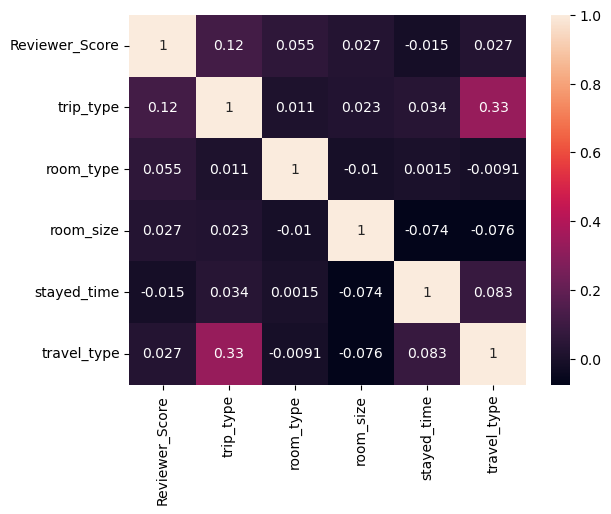

In [352]:
test_df = train_df[["Reviewer_Score", "trip_type", "room_type", "room_size", 
                    "stayed_time", "travel_type"]]
sb.heatmap(test_df.corr(), annot=True)

In [354]:
train_df.to_csv("./data/train.csv", index=False)